### 1) libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('OnlineRetail.csv',encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
s = "01-12-2010 08:26"
s.split()[0].split("-")[0]

'01'

In [4]:
# fetching number of row and columns in our dataframe
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2) Data preprocessing

In [6]:
def showDetails():
    global data 
    for col in data.columns:
        print(f'for feature {col}')
        print(f'number of unique Values {data[col].nunique()}')
        print(f'Random Value 1 :\n{data[col][np.random.randint(0,len(data))]} \n')
        print(f'Random Value 2 :\n{data[col][np.random.randint(0,len(data))]} \n')
        print(f'Random Value 3 :\n{data[col][np.random.randint(0,len(data))]} \n')
        print("\n" + 30*"-" + "\n")

In [7]:
showDetails()

for feature InvoiceNo
number of unique Values 25900
Random Value 1 :
563935 

Random Value 2 :
559305 

Random Value 3 :
571713 


------------------------------

for feature StockCode
number of unique Values 4070
Random Value 1 :
23344 

Random Value 2 :
23199 

Random Value 3 :
21620 


------------------------------

for feature Description
number of unique Values 4223
Random Value 1 :
LUNCH BAG WOODLAND 

Random Value 2 :
LUNCH BAG ALPHABET DESIGN 

Random Value 3 :
FAIRY CAKES NOTEBOOK A7 SIZE 


------------------------------

for feature Quantity
number of unique Values 722
Random Value 1 :
30 

Random Value 2 :
12 

Random Value 3 :
18 


------------------------------

for feature InvoiceDate
number of unique Values 23260
Random Value 1 :
28-10-2011 08:53 

Random Value 2 :
08-08-2011 09:22 

Random Value 3 :
05-08-2011 11:17 


------------------------------

for feature UnitPrice
number of unique Values 1630
Random Value 1 :
0.63 

Random Value 2 :
0.39 

Random Value 3 :
1.

In [8]:
# EXtracting "hour" , "minute" , "day" ,"month" , "year" from "invoice Date" column  

data['day'] = data['InvoiceDate'].apply(lambda x:x.split()[0].split("-")[0]).astype(int)
data['month'] = data['InvoiceDate'].apply(lambda x:x.split()[0].split("-")[1]).astype(int)
data['year'] = data['InvoiceDate'].apply(lambda x:x.split()[0].split("-")[2]).astype(int)
data['hour'] = data['InvoiceDate'].apply(lambda x:x.split()[1].split(":")[0]).astype(int)
data['minute'] = data['InvoiceDate'].apply(lambda x:x.split()[1].split(":")[1]).astype(int)


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1,12,2010,8,26
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,12,2010,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1,12,2010,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,12,2010,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,12,2010,8,26


In [10]:
# droping "invoiceDate" coulmn after extracting data from it
data.drop("InvoiceDate" , axis = 1 , inplace=True)

In [11]:
data[data['Quantity'] < 0 ].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,day,month,year,hour,minute
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,1,12,2010,9,41
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,1,12,2010,9,49
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,1,12,2010,10,24
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,1,12,2010,10,24
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,1,12,2010,10,24


In [12]:
data['Quantity'] = data['Quantity'].apply(lambda x: abs(x))
data['UnitPrice'] = data['UnitPrice'].apply(lambda x: abs(x))

In [13]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,day,month,year,hour,minute


In [14]:
data[data['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,day,month,year,hour,minute
622,536414,22139,NaN,56,0.0,NaN,United Kingdom,1,12,2010,11,52
1970,536545,21134,NaN,1,0.0,NaN,United Kingdom,1,12,2010,14,32
1971,536546,22145,NaN,1,0.0,NaN,United Kingdom,1,12,2010,14,33
1972,536547,37509,NaN,1,0.0,NaN,United Kingdom,1,12,2010,14,33
1987,536549,85226A,NaN,1,0.0,NaN,United Kingdom,1,12,2010,14,34


In [15]:
data = data[data['UnitPrice'] != 0]

In [16]:
data[data['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,day,month,year,hour,minute


In [17]:
data['totalPrice'] = data.apply(lambda x :x.UnitPrice * x.Quantity , axis = 1)

In [18]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,day,month,year,hour,minute,totalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,8,26,22.00


In [19]:
data[data['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"]['StockCode'].unique()

array(['85123A', '85123a'], dtype=object)

In [20]:
data['StockCode'].nunique()

3938

In [21]:
data['StockCode'] = data['StockCode'].apply(lambda x :x.upper())

In [22]:
data['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '23617', '90214U', '23843'],
      dtype=object)

In [27]:
data[data['StockCode'] == "85123A"]['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

 ### 3) Data Visualization

In [22]:
def countPlot(feature):
    global data
    plt.figure(figsize=(10,6))
    sns.countplot(data=data , x=feature)
def Pie(feature,limit = 10):
    plt.pie(data[feature].value_counts()[:limit] , labels=data[feature].value_counts()[:limit].index
           ,autopct = '%1.2f%%',labeldistance= 1.1)
    

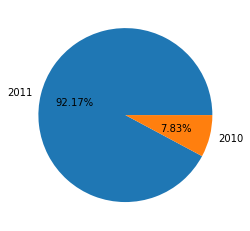

In [23]:
Pie("year")

> 92 percent of the data is recorded in 2011

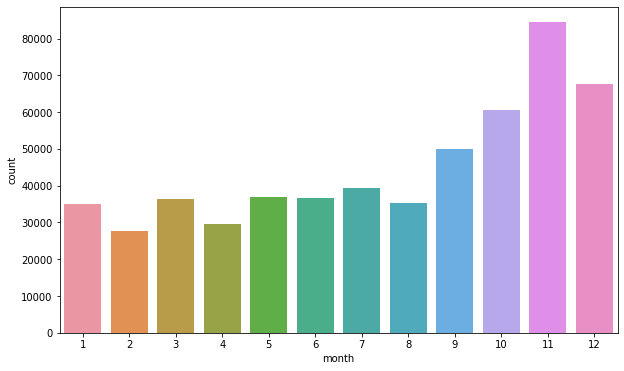

In [24]:
countPlot("month")

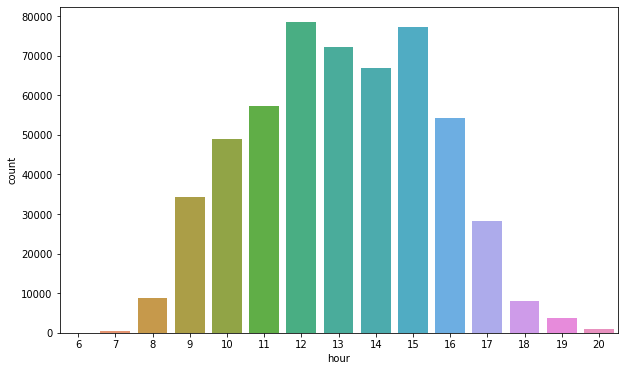

In [25]:
countPlot("hour")

In [26]:
earning_in_month = sqldf("SELECT month,SUM(totalPrice) AS earn_in_month FROM data GROUP BY month")
earning_in_month.head()

,month,earn_in_month
0,1,822728.860
1,2,549201.130
2,3,752011.640
3,4,582410.121
4,5,817738.530


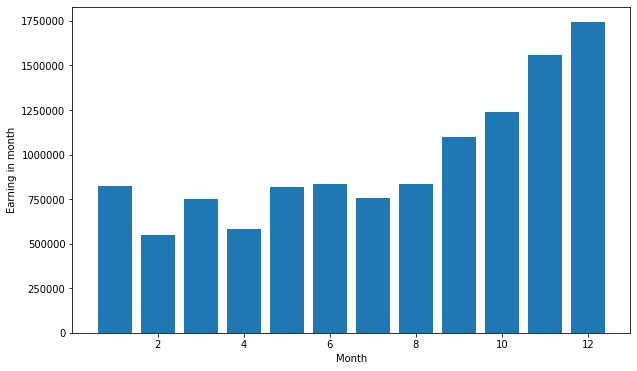

In [27]:
plt.figure(figsize=(10,6))
plt.bar(earning_in_month['month'],earning_in_month['earn_in_month'])
plt.xlabel("Month")
plt.ylabel("Earning in month")
plt.show()

In [28]:
earning_in_day = sqldf("SELECT day,SUM(totalPrice) AS total FROM data GROUP BY day")
earning_in_day.head()

,day,total
0,1,326676.37
1,2,320446.91
2,3,351856.27
3,4,403309.95
4,5,482399.91


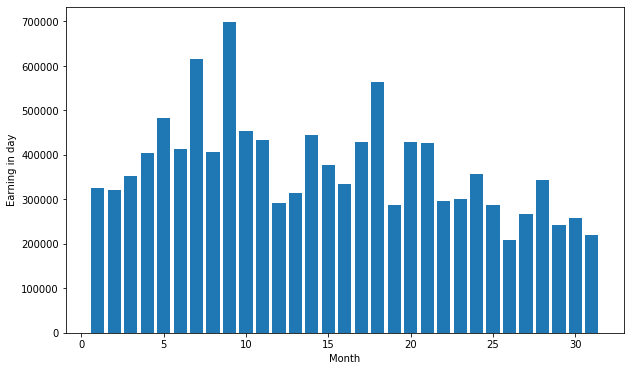

In [29]:
plt.figure(figsize=(10,6))
plt.bar(earning_in_day['day'],earning_in_day['total'])
plt.xlabel("Month")
plt.ylabel("Earning in day")
plt.show()

In [30]:
earning_in_country = sqldf("SELECT Country,SUM(totalPrice) As total FROM data GROUP BY Country ORDER BY total DESC limit 5")
earning_in_country

,Country,total
0,United Kingdom,9.862638e+06
1,EIRE,3.036311e+05
2,Netherlands,2.862311e+05
3,Germany,2.360361e+05
4,France,2.220263e+05


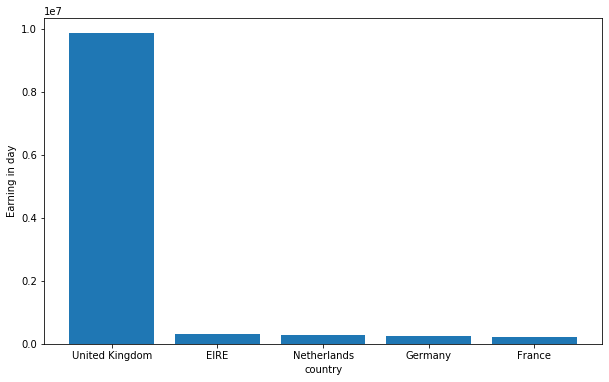

In [31]:
plt.figure(figsize=(10,6))
plt.bar(earning_in_country['Country'],earning_in_country['total'],)
plt.xlabel("country")
plt.ylabel("Earning in day")
plt.show()

### Model 

In [32]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'day', 'month', 'year', 'hour', 'minute',
       'totalPrice'],
      dtype='object')

In [33]:
columnsNotUsed = ['InvoiceNo','Description','CustomerID','minute']
data = data.drop(columnsNotUsed , axis = 1)

In [45]:
data.columns

Index(['StockCode', 'Quantity', 'UnitPrice', 'Country', 'day', 'month', 'year',
       'hour', 'totalPrice'],
      dtype='object')

In [35]:
categoricalColumns = ['StockCode','Country']
numericalColumns = ['Quantity','UnitPrice','day','month','year','hour']

In [46]:
StockEncoder , CountryEncoder = LabelEncoder() , LabelEncoder()
def ApplyEncoder(encoder, feature):
    global data
    encoder.fit(data[feature])
    return encoder.transform(data[feature])

In [50]:
data['StockEncoder'] = ApplyEncoder(StockEncoder,'StockCode')
data['CountryEncoder'] = ApplyEncoder(CountryEncoder,'Country')
data.drop(['StockCode','Country'] , axis = 1,inplace=True)

In [51]:
scaler = StandardScaler()
data =scaler.fit_transform(data)

In [53]:
data.shape

(539394, 9)

In [57]:
wcss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

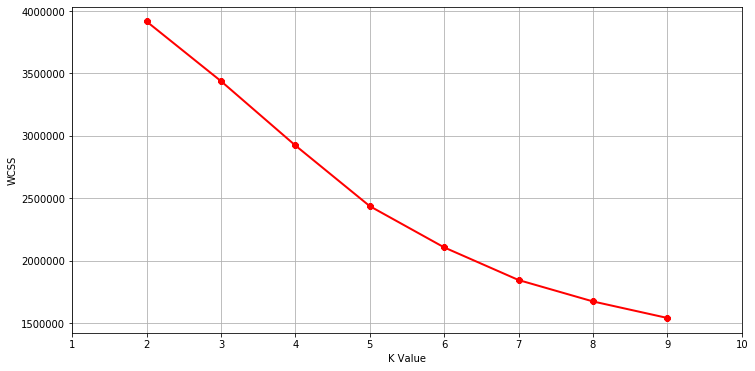

In [58]:
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()